In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\Python\lib\site-packages\torchvision\datasets\mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Python\lib\site-packages\torchvision\datasets\mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\Python\lib\site-packages\torchvision\datasets\mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Python\lib\site-packages\torchvision\datasets\mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

tensor(5)


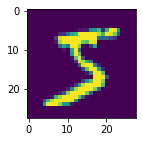

In [6]:
#Check
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
print(y_train[0])

In [7]:
X_train.shape

torch.Size([60000, 28, 28])

In [8]:
#For ConvNN we need to add count of channes, in WB img it is mean 1 because if intence of oone pixul from white to black
X_train = X_train.reshape(60000, 1, 28, 28).float()
X_test = X_test.reshape(-1, 1, 28, 28).float()

In [9]:
X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [10]:
X_train.dtype

torch.float32

In [11]:
#For Competitions 
Comp_test = pd.read_csv(r'D:\Загрузки\MNISTtest.csv (2)\test.csv')

In [12]:
Comp_test.shape

(28000, 784)

In [13]:
Comp_test = torch.tensor(Comp_test.values).reshape(-1, 1, 28, 28).float()

In [14]:
Comp_test.shape

torch.Size([28000, 1, 28, 28])

In [ ]:
1) Tanh -> ReLU
2) AvgPool -> MaxPool
3) lr=1.0e-3 -> lr=1.0e-4

In [48]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        #Convolutional layers
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        #Fully_Connected layers
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [49]:
torch.cuda.is_available()

True

In [50]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# lenet5 = lenet5.to(device)

In [51]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-4)

In [52]:
batch_size = 100

test_accuracy_history = []
Tr_batch_accuracy_histore = []

test_loss_history = []
Tr_batch_loss_history = []


X_test = X_test #.to(device)
y_test = y_test #.to(device)

# Comp_test = Comp_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
    
        # preds = lenet5.forward(X_batch) 
        
        loss_value = loss(lenet5.forward(X_batch), y_batch).backward()
        # loss_value.backward()
        
        optimizer.step()
        
    #Получаем значение на тесте    
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    Tr_batch_loss_history.append(loss(lenet5.forward(X_batch), y_batch).data.cpu())

    accuracy = accuracy_score(y_test.cpu(), test_preds.argmax(dim=1).data.cpu())
    test_accuracy_history.append(accuracy)
    Tr_batch_accuracy_histore.append( accuracy_score(y_batch.cpu(), lenet5.forward(X_batch).argmax(dim=1).data.cpu()) )

    Comp_preds = lenet5.forward(Comp_test).data.cpu()
    
    print(accuracy)
    
    

0.9555
0.9675
0.9777
0.9817
0.983
0.9803
0.9839
0.982
0.9847
0.9853
0.9845
0.9881
0.9856
0.9843
0.9859
0.9864
0.9867
0.9884
0.9864
0.9853
0.9854
0.9878
0.9879
0.9857
0.9891
0.9876
0.9874
0.9872
0.9846
0.9876
0.9893
0.987
0.9883
0.9878
0.9881
0.9852
0.9865
0.9887
0.9887
0.9889
0.9888
0.9888
0.9888
0.9884
0.9883
0.9895
0.989
0.9887
0.9886
0.9888


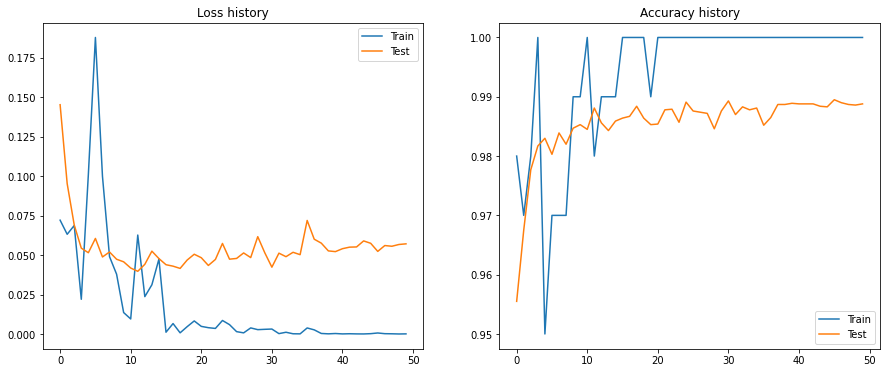

In [53]:
#Graphs for watching of over/under - fiting
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))


axes[0].plot(Tr_batch_loss_history, label='Train')
axes[0].plot(test_loss_history, label='Test')
axes[0].title.set_text('Loss history')
axes[0].legend();

axes[1].plot(Tr_batch_accuracy_histore, label='Train')
axes[1].plot(test_accuracy_history, label='Test')
axes[1].title.set_text('Accuracy history')
axes[1].legend();
# plt.legend();

In [32]:
lenet5.forward(X_test).argmax(dim=1) #(dim=0)

tensor([7, 2, 1,  ..., 4, 5, 6])

In [115]:
 y_test[:20]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
       device='cuda:0')

In [35]:
torch.cuda.empty_cache()

In [29]:
Comp_preds.argmax(dim=1)

tensor([2, 0, 9,  ..., 3, 9, 2])

In [54]:
pd.DataFrame({'ImageId': range(1, 28001), 'Label': Comp_preds.argmax(dim=1)}).set_index('ImageId').to_csv('MNISTv1_1.csv')